In [1]:
%load_ext autoreload

%autoreload 2
# from scenarios.scenario1 import Scenario1
from scenario_runner import scenario_runner
from display.plot_connections_graph import plot_connections_graph
from scenarios.scenario2 import Scenario2
from core.world import world
from constants import SEX
import policies

from matplotlib import pyplot as plt
from tqdm import tqdm

In [39]:
import random
def gen_random_age():
    return 100*random.random()
scenario_params = {
    'seed': None,
    'num_of_neighborhoods': 5,
    'school': {
        'num_of_sub_sites': 10,
        'hub_area': 100, 'hub_dispersion': 0.5, 'hub_capacity': 50,
        'sub_area': 100, 'sub_dispersion': 0.5, 'sub_capacity': 50,
    },
    'work': {
        'num_of_sub_sites': 2,
        'hub_area': 100, 'hub_dispersion': 0.5, 'hub_capacity': 50,
        'sub_area': 100, 'sub_dispersion': 0.5, 'sub_capacity': 50,
    },
    'work_in_neighborhood_prob': 0.7,
    'work_in_hub_prob': 0.1,
    'num_schools_per_neighborhood': 2,
    'num_workplaces_per_neighborhood': 3,
    'num_households_per_neighborhood': 50,
    'num_adults_in_household': 2,
    'num_children_in_household': 3,
    'person_default_params': {
        'age': gen_random_age(),
        'sex': SEX.FEMALE,
        'occupation': None,
        'susceptibility_degree': 1,
        'obedient_degree': 1,
        'is_infected': False,
        'symptoms_degree': 0,
        'immunity_degree': 0,
        'timestamp_infected': None,
        'timestamp_symptomatic': None
    },
    'initial_infected_percentage': 10, 
    'initial_infected_neighborhoods': [1],
    'policies': [policies.lockdown.Lockdown()]
}
metrics = scenario_runner(Scenario2(scenario_params), sim_days=60)#, log_metrics=['sir_distribution'])
metrics_df = metrics.to_df()

100%|██████████████████████████████████████████████████████████████████████████| 720/720 [00:14<00:00, 50.49it/s]


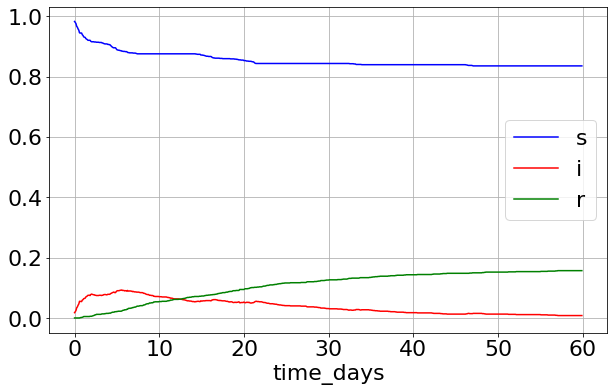

In [40]:
metrics_df.set_index('time_days')[['s', 'i', 'r']].plot(figsize=(10, 6), color=['b', 'r', 'g'])    # plt.legend()
plt.grid()

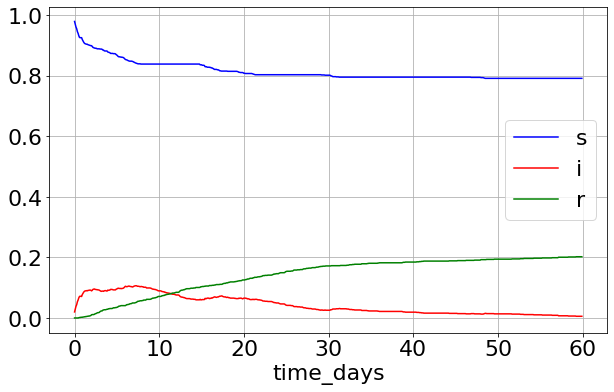

In [26]:
metrics_df.set_index('time_days')[['s', 'i', 'r']].plot(figsize=(10, 6), color=['b', 'r', 'g'])    # plt.legend()
plt.grid()

Text(0.5, 0, 'Time [days]')

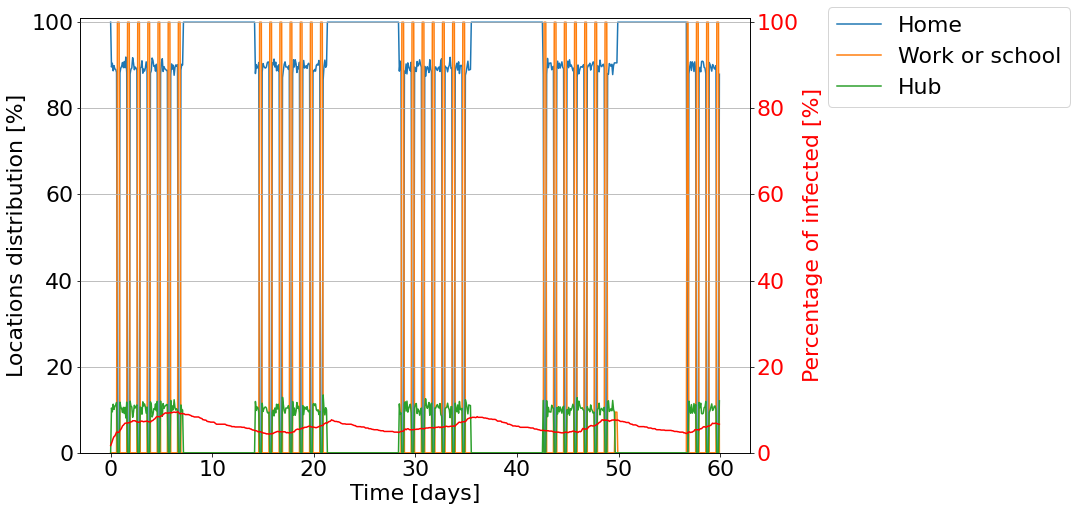

In [20]:
%matplotlib inline
plt.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(metrics_df.time_days, metrics_df.at_home*100, label='Home')
ax1.plot(metrics_df.time_days, metrics_df.at_work_or_school*100, label='Work or school')
ax1.plot(metrics_df.time_days, metrics_df.at_hub*100, label='Hub')
ax1.set_ylabel('Locations distribution [%]')
ax1.set_ylim(0, 101)

ax2 = plt.twinx(ax1)
ax2.plot(metrics_df.time_days, metrics_df.i*100, 'r', label='I')
ax2.set_ylabel('Percentage of infected [%]', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 101)
ax1.legend(bbox_to_anchor=(1.1, 1.05))


plt.grid()
ax1.set_xlabel('Time [days]')


In [5]:
from display.plot_connections_graph import generate_graph
import networkx as nx

In [42]:
G = generate_graph(metrics.log[:], sample_ratio=1)
len(G.edges)

152753

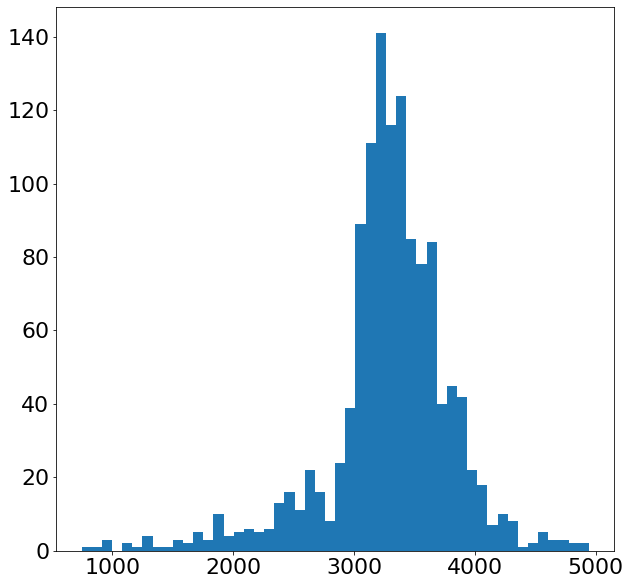

In [44]:
plt.figure(figsize=(10, 10))
# degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# degree_sequence
G_mat = nx.convert_matrix.to_numpy_array(G)
# G_mat = G_mat / G_mat.max()
# G_mat = G_mat>5
_ = plt.hist(G_mat.sum(axis=0), bins=50)
# plt.xscale('log')
# plt.yscale('log')

In [48]:
import numpy as np
np.linalg.eig(G_mat)

(array([3424.34987465, 3285.93666793, 3241.33338792, ..., -617.36569761,
        -603.54721103, -624.28637773]),
 array([[-3.37136843e-02, -5.38528140e-02,  2.55483226e-02, ...,
         -2.97788043e-02,  2.41734685e-04,  5.01977198e-05],
        [-3.79474931e-02, -6.46766465e-02,  3.39635247e-02, ...,
         -1.52750058e-03, -8.49745052e-03,  2.74334617e-02],
        [-3.26441379e-02, -5.62161270e-02,  3.06045051e-02, ...,
          1.77884648e-02,  2.15898357e-02, -2.19219793e-02],
        ...,
        [-1.47679536e-02,  1.49270908e-02,  7.37271092e-03, ...,
         -1.55653240e-02, -1.07907533e-02,  2.07514216e-02],
        [-1.28608612e-02,  1.30707682e-02,  6.50122927e-03, ...,
         -2.59626128e-02,  1.44311767e-02, -1.63013855e-02],
        [-1.24024327e-02,  1.25692129e-02,  6.32554499e-03, ...,
          4.05199718e-02, -3.63818057e-03, -2.30872562e-03]]))

In [31]:
G_mat = nx.convert_matrix.to_numpy_array(G)
G_mat

array([[  0., 561., 569., ...,   0.,   0.,   0.],
       [561.,   0., 562., ...,   0.,   0.,   0.],
       [569., 562.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0., 581., 567.],
       [  0.,   0.,   0., ..., 581.,   0., 566.],
       [  0.,   0.,   0., ..., 567., 566.,   0.]])

Text(0.5, 1.0, '2020-03-11 18:00:00')

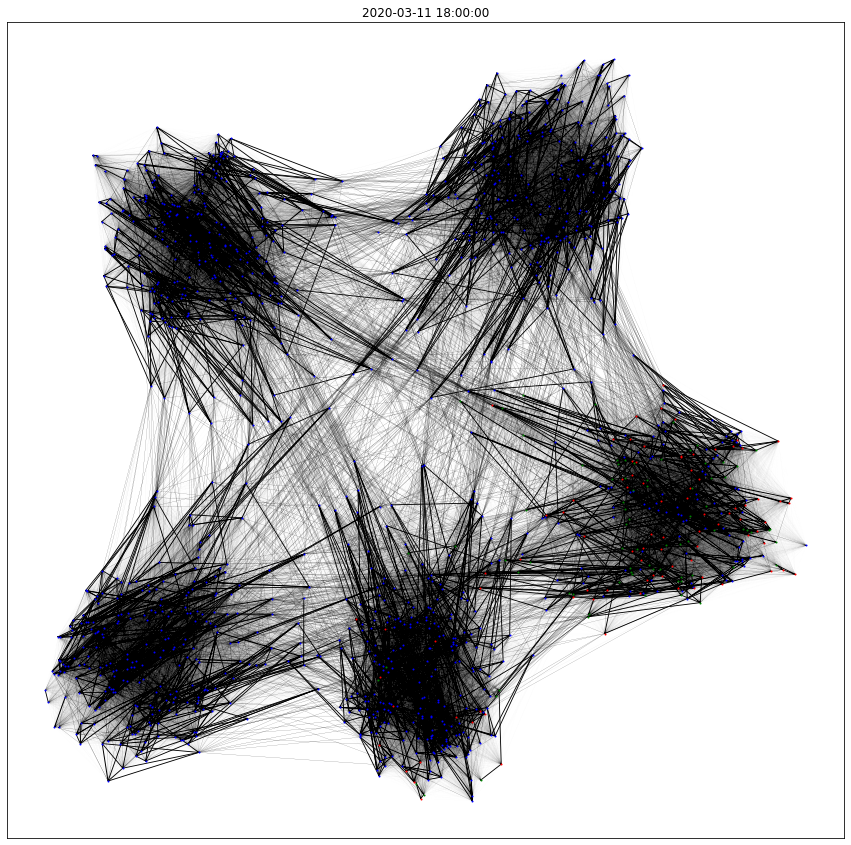

In [17]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 15))

log = metrics.log[10*12]
t = log['time']
sir_people_uuid = log['sir_people_uuid']
s_nodes = sir_people_uuid[0]
i_nodes = sir_people_uuid[1]
r_nodes = sir_people_uuid[2]
# s_nodes = [p.uuid for p in world.people if p.traits.immunity_degree == 0 and not p.traits.is_infected]
# i_nodes = [p.uuid for p in world.people if p.traits.is_infected]
# r_nodes = [p.uuid for p in world.people if p.traits.immunity_degree > 0 and not p.traits.is_infected]

fig, ax, pos = plot_connections_graph(metrics.log[:], s_nodes, i_nodes, r_nodes, fig=fig, ax=ax, reset_pos=True, sample_ratio=1)
ax.set_title(t)

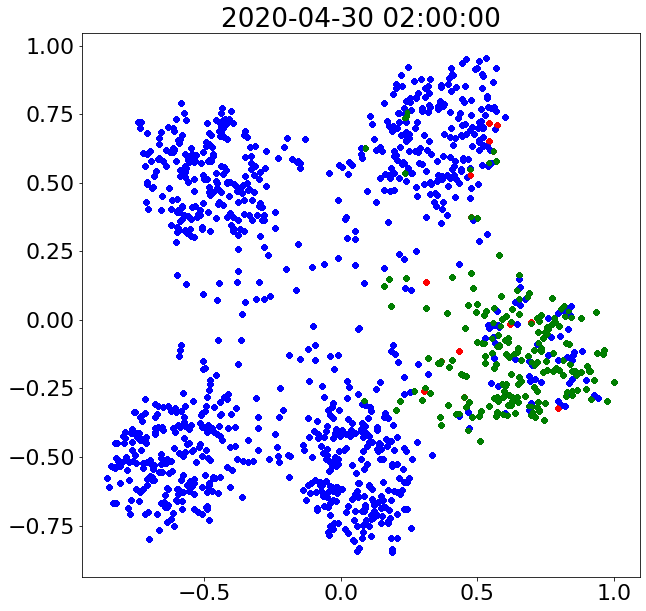

100%|██████████████████████████████████████████████████████████████████████████| 180/180 [01:20<00:00,  2.23it/s]


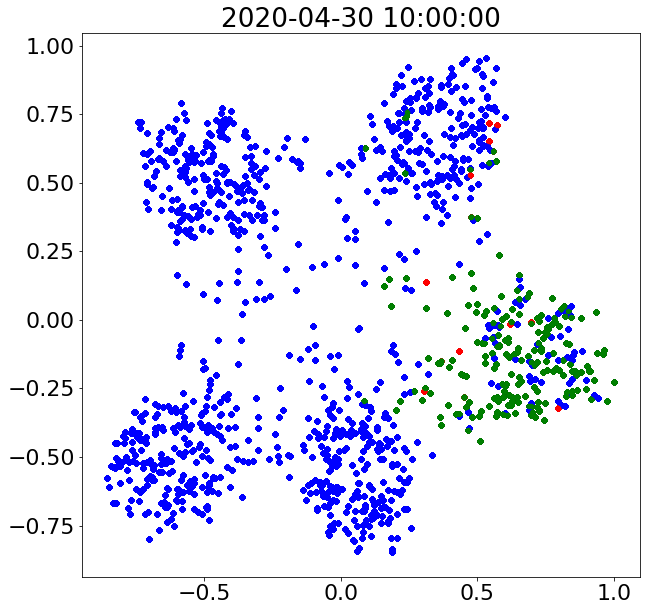

In [49]:
import pandas as pd
from IPython import display
import time
frame_delay = 0.
fig, ax = plt.subplots(figsize=(10, 10))
pos_df = pd.DataFrame(pos).T

for log in tqdm(metrics.log[::4]):
    t = log['time']
    sir_people_uuid = log['sir_people_uuid']
    for nodes, color in zip(sir_people_uuid, ['b', 'r', 'g']):
        ax.scatter(pos_df.loc[nodes, 0], pos_df.loc[nodes, 1], c=color, s=20)
    ax.set_title
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(frame_delay)
    ax.set_title(t)
#     ax.cla()

In [10]:
len(world.people)

1250

In [11]:
import sys
def get_size(obj, seen=None):
    # From https://goshippo.com/blog/measure-real-size-any-python-object/
    # Recursively finds size of objects
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
# Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

In [12]:
get_size(world.people[1])/ (1024*1024)

1.482710838317871